<a href="https://colab.research.google.com/github/zeroznone/data-science-project/blob/main/CAR_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
cd= pd.read_csv("/content/Cardekho_Extract.csv")

In [3]:
cd

,Source.Name,web-scraper-order,web-scraper-start-url,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,cardekho_extract(0-2000).csv,1611917819-1662,https://www.cardekho.com/used-car-details/used...,Maruti Alto Std,1.2 Lakh*,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,cardekho_extract(0-2000).csv,1611918361-1902,https://www.cardekho.com/used-car-details/used...,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,cardekho_extract(0-2000).csv,1611917012-1306,https://www.cardekho.com/used-car-details/used...,Hyundai i20 Asta,2.15 Lakh*,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,cardekho_extract(0-2000).csv,1611917695-1607,https://www.cardekho.com/used-car-details/used...,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,cardekho_extract(0-2000).csv,1611914861-367,https://www.cardekho.com/used-car-details/used...,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,cardekho_extract(17001-20037).csv,1612171416-4838,https://www.cardekho.com/used-car-details/used...,Hyundai Santro Xing GLS,2 Lakh*,NaN,2014.0,Individual,"40,000 kms",First Owner,Petrol,Manual,Mileage17.92 kmpl,Engine1086 CC,Max Power62.1 bhp,Seats5
11997,cardekho_extract(17001-20037).csv,1612175402-6620,https://www.cardekho.com/used-car-details/used...,Hyundai Creta 1.6 VTVT E Plus,8.4 Lakh*,NaN,2017.0,Dealer,"15,000 kms",First Owner,Petrol,Manual,Mileage15.29 kmpl,Engine1591 CC,Max Power121.3 bhp,Seats5
11998,cardekho_extract(17001-20037).csv,1612175451-6642,https://www.cardekho.com/used-car-details/used...,Ford Freestyle Titanium Plus Petrol BSIV,7.25 Lakh*,New Car (On-Road Price) : Rs.6.93-9.13 Lakh*,2018.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage19.0 kmpl,Engine1194 CC,Max Power94.68 bhp,Seats5
11999,cardekho_extract(17001-20037).csv,1612175293-6572,https://www.cardekho.com/used-car-details/used...,BMW X1 sDrive20d,11.5 Lakh*,New Car (On-Road Price) : Rs.49.26-50.87 Lakh*,2010.0,Dealer,"1,06,271 kms",First Owner,Diesel,Automatic,Mileage17.05 kmpl,Engine1995 CC,Max Power184 bhp,Seats5


In [4]:
cd.columns

Index(['Source.Name', 'web-scraper-order', 'web-scraper-start-url',
       'full_name', 'selling_price', 'new-price', 'year', 'seller_type',
       'km_driven', 'owner_type', 'fuel_type', 'transmission_type', 'mileage',
       'engine', 'max_power', 'seats'],
      dtype='object')

In [5]:
cd.drop_duplicates(inplace=True)

In [6]:
cd.dropna(inplace=True)

In [7]:
cd['selling_price']= cd['selling_price'].str.split(expand=True).drop([1],axis=1)

In [8]:
cd['mileage']=cd['mileage'].str.strip('Mileage kmpl')

In [9]:
cd

,Source.Name,web-scraper-order,web-scraper-start-url,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
1,cardekho_extract(0-2000).csv,1611918361-1902,https://www.cardekho.com/used-car-details/used...,Hyundai Grand i10 Asta,5.5,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,18.9,Engine1197 CC,Max Power82 bhp,Seats5
4,cardekho_extract(0-2000).csv,1611914861-367,https://www.cardekho.com/used-car-details/used...,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,22.77,Engine1498 CC,Max Power98.59 bhp,Seats5
5,cardekho_extract(0-2000).csv,1611917653-1588,https://www.cardekho.com/used-car-details/used...,Maruti Wagon R VXI BS IV,3.5,New Car (On-Road Price) : Rs.5.16-6.94 Lakh*,2013.0,Individual,"35,000 kms",First Owner,Petrol,Manual,18.9,Engine998 CC,Max Power67.1 bhp,Seats5
6,cardekho_extract(0-2000).csv,1611914813-346,https://www.cardekho.com/used-car-details/used...,Hyundai i10 Sportz 1.2,3.15,New Car (On-Road Price) : Rs.6.54-6.63 Lakh*,2013.0,Dealer,"40,000 kms",First Owner,Petrol,Manual,20.36,Engine1197 CC,Max Power78.9 bhp,Seats5
7,cardekho_extract(0-2000).csv,1611914151-53,https://www.cardekho.com/used-car-details/used...,Maruti Wagon R VXI,4.1,New Car (On-Road Price) : Rs.5.26-7.01 Lakh*,2018.0,Dealer,"17,512 kms",First Owner,Petrol,Manual,20.51,Engine998 CC,Max Power67.04 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11983,cardekho_extract(17001-20037).csv,1612175817-6806,https://www.cardekho.com/used-car-details/used...,Hyundai i20 2015-2017 Asta Option 1.4 CRDi,7.5,New Car (On-Road Price) : Rs.9.44-12.95 Lakh*,2016.0,Dealer,"48,000 kms",First Owner,Diesel,Manual,22.54,Engine1396 CC,Max Power88.73 bhp,Seats5
11984,cardekho_extract(17001-20037).csv,1612170959-4632,https://www.cardekho.com/used-car-details/used...,Maruti Celerio VXI,3.85,New Car (On-Road Price) : Rs.5.03-6.32 Lakh*,2016.0,Dealer,"35,000 kms",First Owner,Petrol,Manual,23.1,Engine998 CC,Max Power67.04 bhp,Seats5
11992,cardekho_extract(17001-20037).csv,1612170820-4570,https://www.cardekho.com/used-car-details/used...,Hyundai Creta 1.4 CRDi S,7.7,New Car (On-Road Price) : Rs.11.49-19.41 Lakh*,2016.0,Individual,"1,21,054 kms",First Owner,Diesel,Manual,21.38,Engine1396 CC,Max Power88.7 bhp,Seats5
11998,cardekho_extract(17001-20037).csv,1612175451-6642,https://www.cardekho.com/used-car-details/used...,Ford Freestyle Titanium Plus Petrol BSIV,7.25,New Car (On-Road Price) : Rs.6.93-9.13 Lakh*,2018.0,Individual,"20,000 kms",First Owner,Petrol,Manual,19.0,Engine1194 CC,Max Power94.68 bhp,Seats5


In [10]:
cd['max_power']=cd['max_power'].str.strip('Max Power' 'bhp')

In [11]:
cd['seats']=(cd['seats'].str.strip("Seats"))

In [12]:
cd['km_driven']= cd['km_driven'].str.strip('kms')

In [13]:
cd['engine']=cd['engine'].str.strip('Engine' 'CC')

In [14]:
cd.rename(columns={'max_power':'max_power(bhp)',"selling_price":"selling_price(in Lakh*)",'engine':'engine(cc)','mileage':'mileage(kmpl)'},inplace=True)

In [15]:
cd.columns

Index(['Source.Name', 'web-scraper-order', 'web-scraper-start-url',
       'full_name', 'selling_price(in Lakh*)', 'new-price', 'year',
       'seller_type', 'km_driven', 'owner_type', 'fuel_type',
       'transmission_type', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'seats'],
      dtype='object')

In [16]:
cd.drop(['Source.Name', 'web-scraper-order', 'web-scraper-start-url'],inplace=True,axis=1)

In [17]:
cd

,full_name,selling_price(in Lakh*),new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage(kmpl),engine(cc),max_power(bhp),seats
1,Hyundai Grand i10 Asta,5.5,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000",First Owner,Petrol,Manual,18.9,1197,82,5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000",First Owner,Diesel,Manual,22.77,1498,98.59,5
5,Maruti Wagon R VXI BS IV,3.5,New Car (On-Road Price) : Rs.5.16-6.94 Lakh*,2013.0,Individual,"35,000",First Owner,Petrol,Manual,18.9,998,67.1,5
6,Hyundai i10 Sportz 1.2,3.15,New Car (On-Road Price) : Rs.6.54-6.63 Lakh*,2013.0,Dealer,"40,000",First Owner,Petrol,Manual,20.36,1197,78.9,5
7,Maruti Wagon R VXI,4.1,New Car (On-Road Price) : Rs.5.26-7.01 Lakh*,2018.0,Dealer,"17,512",First Owner,Petrol,Manual,20.51,998,67.04,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11983,Hyundai i20 2015-2017 Asta Option 1.4 CRDi,7.5,New Car (On-Road Price) : Rs.9.44-12.95 Lakh*,2016.0,Dealer,"48,000",First Owner,Diesel,Manual,22.54,1396,88.73,5
11984,Maruti Celerio VXI,3.85,New Car (On-Road Price) : Rs.5.03-6.32 Lakh*,2016.0,Dealer,"35,000",First Owner,Petrol,Manual,23.1,998,67.04,5
11992,Hyundai Creta 1.4 CRDi S,7.7,New Car (On-Road Price) : Rs.11.49-19.41 Lakh*,2016.0,Individual,"1,21,054",First Owner,Diesel,Manual,21.38,1396,88.7,5
11998,Ford Freestyle Titanium Plus Petrol BSIV,7.25,New Car (On-Road Price) : Rs.6.93-9.13 Lakh*,2018.0,Individual,"20,000",First Owner,Petrol,Manual,19.0,1194,94.68,5


In [18]:
cd['seats']


1        5
4        5
5        5
6        5
7        5
        ..
11983    5
11984    5
11992    5
11998    5
11999    5
Name: seats, Length: 5392, dtype: object

## Dataset Distribution

In [19]:
cd.columns

Index(['full_name', 'selling_price(in Lakh*)', 'new-price', 'year',
       'seller_type', 'km_driven', 'owner_type', 'fuel_type',
       'transmission_type', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'seats'],
      dtype='object')

In [20]:
des=cd.groupby('fuel_type').count()


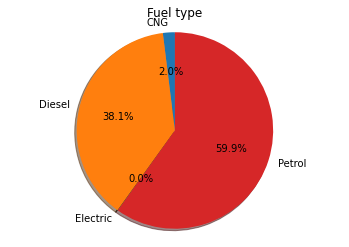

In [21]:
fig1, ax1 = plt.subplots()
ax1.pie(des['full_name'].values, labels=des.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fuel type')

plt.show()

In [22]:
des=cd.groupby('year').count()

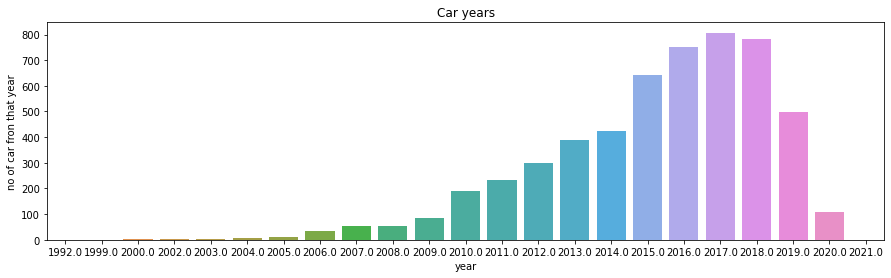

In [23]:
fig, ax = plt.subplots(figsize=(15,4))
  

sns.barplot(x=des.index, y='fuel_type', data=des)
plt.ylabel('no of car fron that year')
plt.title('Car years')

plt.show()

Encoding columns

In [24]:
cd.fuel_type

1        Petrol
4        Diesel
5        Petrol
6        Petrol
7        Petrol
          ...  
11983    Diesel
11984    Petrol
11992    Diesel
11998    Petrol
11999    Diesel
Name: fuel_type, Length: 5392, dtype: object

In [25]:
cd.fuel_type.replace(to_replace={'Petrol','Diesel','CNG','Electric'},value={1,2,3,4},inplace=True)

In [26]:
cd.seller_type.replace(to_replace={'Individual', 'Dealer', 'Trustmark Dealer'},value=[1,2,3],inplace=True)

In [27]:
cd.transmission_type.replace(to_replace={'Manual', 'Automatic'},value=[1,2],inplace=True)


In [28]:
cd['km_driven']=cd['km_driven'].str.strip('*')

In [29]:
cd.owner_type.replace(to_replace={'First Owner', 'Third Owner', 'Second Owner'},value=[1,2,3],inplace=True)

In [30]:
 cd['new-price']=cd['new-price'].str.strip('New Car (On-Road Price) :s.' 'Lakh*')

In [31]:
cd[cd=='0.0 km/hr']['new-price'].notnull()

1        False
4        False
5        False
6        False
7        False
         ...  
11983    False
11984    False
11992    False
11998    False
11999    False
Name: new-price, Length: 5392, dtype: bool

In [32]:
cd.sort_values(by=['mileage(kmpl)'],ascending=True)

,full_name,selling_price(in Lakh*),new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage(kmpl),engine(cc),max_power(bhp),seats
471,Hyundai Santro LP - Euro II,"55,000*",5.23-7.14,2002.0,2,"80,000",1,3,2,0.0,999,null,5
3931,Toyota Fortuner 4X2 AT,16.45,35.53-37.40,2013.0,1,"1,43,000",1,3,1,0.0,2694,163.05,7
9222,Hyundai Santro AT,1.05,5.23-7.07,2003.0,2,"63,000",1,3,1,0.0,999,null,5
4392,Hyundai Santro GS,1.75,5.23-7.07,2006.0,2,"90,000",1,3,2,0.0,999,null,5
8509,Jeep Compass 1.4 Sport,14,19.77-29.37,2019.0,2,"10,000",1,3,2,0.0,1368,160.77,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,Jeep Wrangler 2016-2019 3.6 4X4,48.75,73.56-79.29,2017.0,1,"40,000",1,3,1,9.5,3604,280,5
1539,Bentley Continental GT Speed Convertible BSIV,1.45,3.77Cr-4.48,2012.0,1,"9,000",1,3,1,9.5,5998,626,4
1369,BMW 6 Series 640d Coupe,44.9,79.05-91.94,2015.0,1,"25,000",1,2,1,9.52,2993,313,4
10466,BMW 6 Series 640d Coupe,40,78.02-90.10,2013.0,1,"24,000",1,2,1,9.52,2993,313,4


In [33]:
cd['mileage(kmpl)']=cd['mileage(kmpl)'].str.strip('km/')

In [34]:
cd['km_driven']=cd['km_driven'].str.replace(',','')

In [35]:
cd['selling_price(in Lakh*)']=cd['selling_price(in Lakh*)'].str.replace(',','')

In [36]:
cd['selling_price(in Lakh*)']=cd['selling_price(in Lakh*)'].str.strip('*')

In [37]:
cd.replace(',','',inplace=True)

In [38]:
cd['new-price']=(cd['new-price'].str.split(expand=True,pat="-")).drop(1,axis=1)

## Resetting index

In [39]:
cd.reset_index(inplace=True)

In [40]:
cd.drop(['index','level_0'],axis=1,inplace=True)

KeyError: ignored

In [ ]:
cd.dtypes

In [42]:
cd['mileage(kmpl)']=cd['mileage(kmpl)'].astype(float)

ValueError: ignored

In [43]:
cd.replace(to_replace=" ",value=0.0,inplace=True)

In [59]:
cd.replace(to_replace="null",value=0.0,inplace=True)

## Changing Crore values in lakh

In [44]:
crore=cd.loc[cd['new-price'].str.contains("Cr", case=False)]['new-price']

In [45]:
crore=crore.str.strip('Cr')

In [46]:
crore=crore.astype('float').iloc[:]*100


In [47]:
index=cd[cd['new-price'].str.contains("Cr", case=False)]['new-price'].index

In [48]:
index

Int64Index([ 671,  676,  787,  810,  863, 1238, 1266, 1299, 1842, 2023, 2137,
            2180, 2257, 2358, 2396, 2446, 2805, 3348, 3512, 3594, 4818],
           dtype='int64')

In [49]:
cd.loc[index,'new-price']=crore

In [50]:
cd.loc[index,'new-price']

671     161
676     164
787     377
810     137
863     167
1238    169
1266    171
1299    169
1842    169
2023    129
2137    169
2180    235
2257    169
2358    501
2396    172
2446    168
2805    168
3348    175
3512    168
3594    166
4818    217
Name: new-price, dtype: object

In [51]:
cd['mileage(kmpl)']=cd['mileage(kmpl)'].str.strip('km/hr')

## Spllitting Data

In [60]:
X=cd.drop(['full_name','selling_price(in Lakh*)'],axis=1)
y=cd['selling_price(in Lakh*)']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2,test_size=0.1)

In [62]:
cd.replace(to_replace="null",value=0.0,inplace=True)

# Model training

# linear regression

In [63]:
linear = LinearRegression()



In [64]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### model evaluaion

In [65]:
data_prediction=linear.predict(X_train)

# R2 score

In [66]:
from sklearn import metrics



In [67]:
error_score=metrics.r2_score(y_train,data_prediction)
print("R squared Error",error_score)

R squared Error 0.08219266504253653


Visualization

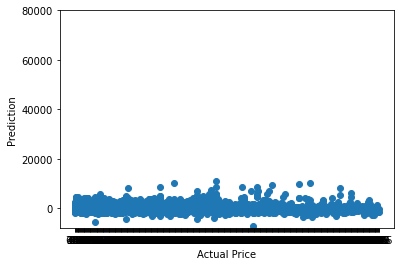

In [68]:
plt.scatter(y_train,data_prediction)
plt.yticks([0,20000,40000,60000,80000])
plt.xlabel('Actual Price')
plt.ylabel('Prediction')
plt.show()

In [69]:
test_prediction =linear.predict(X_test)

In [70]:
error_score=metrics.r2_score(y_test,test_prediction)
print("R squared Error",error_score)

R squared Error -28851.6019597594


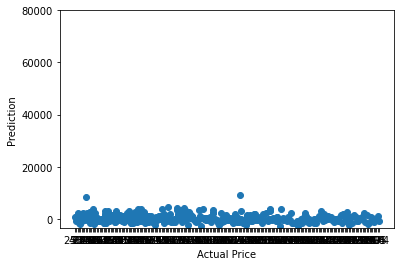

In [71]:
plt.scatter(y_test,test_prediction)
plt.yticks([0,20000,40000,60000,80000])
plt.xlabel('Actual Price')
plt.ylabel('Prediction')
plt.show()

## Ridge Regression

In [72]:
from sklearn import linear_model

In [73]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

R2 score

In [74]:
ridge_pre=clf.predict(X_train)


In [76]:
error_score=metrics.r2_score(y_train,ridge_pre)
print("R squared Error",error_score)

R squared Error 0.08219265581931456


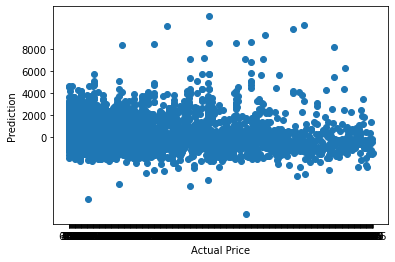

In [80]:
plt.scatter(y_train,ridge_pre)
plt.yticks([0,2000,4000,6000,8000])
plt.xlabel('Actual Price')
plt.ylabel('Prediction')
plt.show()

In [77]:
test_pre=clf.predict(X_test)

In [78]:
error_score=metrics.r2_score(y_test,test_pre)
print("R squared Error",error_score)

R squared Error -28846.76122640419


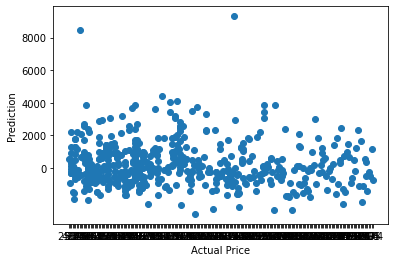

In [81]:
plt.scatter(y_test,test_pre)
plt.yticks([0,2000,4000,6000,8000])
plt.xlabel('Actual Price')
plt.ylabel('Prediction')
plt.show()